In [2]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
import time
from bs4 import BeautifulSoup

In [3]:
options = Options()
options.add_experimental_option("detach", True)
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service, options=options)

#네이버 검색창에서 '프로야구 순위' 검색시 조회되는 화면의 URL
url = "https://search.naver.com/search.naver?sm=tab_hty.top&where=nexearch&query=%ED%94%84%EB%A1%9C%EC%95%BC%EA%B5%AC+%EC%88%9C%EC%9C%84&oquery=%ED%94%84%EB%A1%9C%EC%95%BC%EA%B5%AC&tqi=i6H45lp0JywssSPhcxRssssstfC-323156"

driver.get(url)

time.sleep(3)


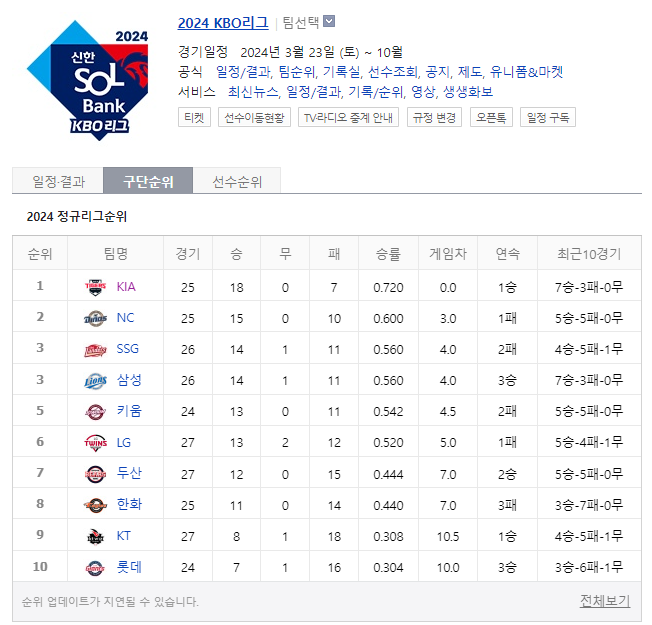

# 여기서 현재 1위팀 정보를 보고 싶다면?

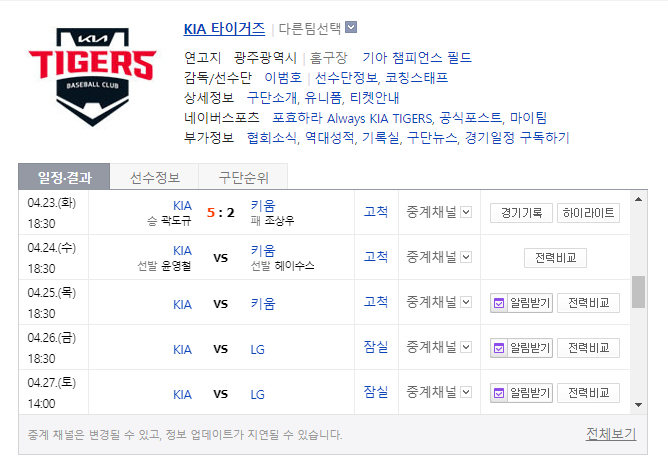

* XPath: html의 특정 요소를 참조할 수 있는 축약된 형태의 절대경로   
(html 요소, 클래스, id 등을 참고한 유일한 절대 경로)

In [4]:
driver.find_element(By.XPATH, '//*[@id="teamRankTabPanel_0"]/table/tbody/tr[1]/td[1]/p/span/a').click()

In [5]:
soup=BeautifulSoup(driver.page_source,'html.parser')

<html data-platform="win32" data-useragent="mozilla/5.0 (windows nt 10.0; win64; x64) applewebkit/537.36 (khtml, like gecko) chrome/127.0.0.0 safari/537.36" lang="ko"><head> <meta charset="utf-8"/> <meta content="always" name="referrer"/> <meta content="telephone=no,address=no,email=no" name="format-detection"/> <meta content="KIA 타이거즈 : 네이버 검색" property="og:title"/> <meta content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png" property="og:image"/> <meta content="'KIA 타이거즈'의 네이버 검색 결과입니다." property="og:description"/> <meta content="'KIA 타이거즈'의 네이버 검색 결과입니다." lang="ko" name="description"/> <title>KIA 타이거즈 : 네이버 검색</title> <link href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico" rel="shortcut icon"/> <link href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" rel="search" title="Naver" type="application/opensearchdescription+xml"/><link href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_240822.css" rel="stylesheet" typ
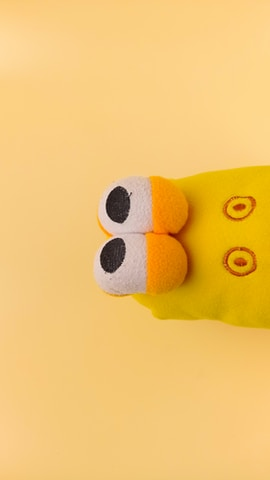
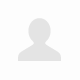
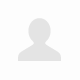

In [6]:
soup

# XPath 정보 가져오기

* 웹페이지 로드 - 개발자 모드 (F12) - HTML 요소 선택 도구 아이콘 클릭

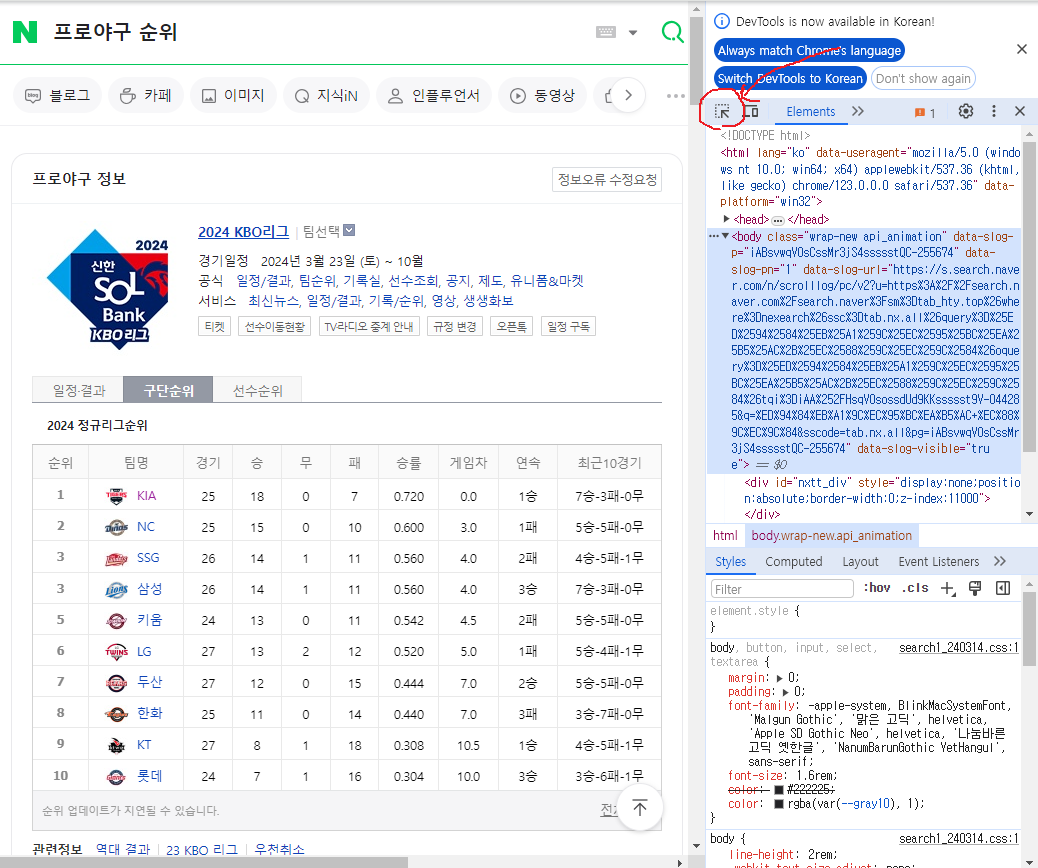

* 원하는 HTML 요소 선택

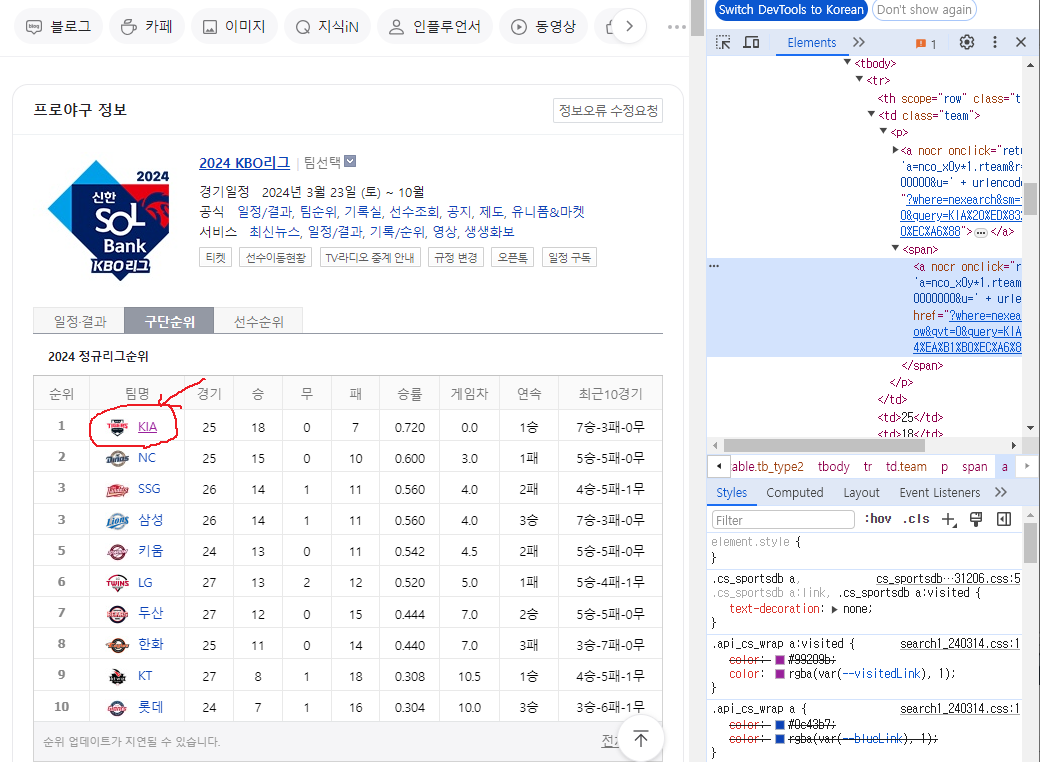

* 우측 개발자 모드에서 선택된 Element 항목의 '...' 클릭 - Copy - Copy XPath 선택
* 카피한 결과는 아래와 같다.

In [7]:
from datetime import datetime
import os
current_date = datetime.now().strftime('%y-%m-%d')
current_date
file_path = f'네이버_현재_1등팀_정보_{current_date}.html'
if not os.path.exists(file_path):
    with open(file_path, 'w', encoding='utf-8') as file:
        file.write(str(soup))
        print("HTML 파일이 저장되었습니다.")